In [133]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy
import sklearn as sc
import statsmodels.api as sm
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
from IPython.display import display
from scipy import stats


In [134]:
df = pd.read_csv('sample.csv')

In [202]:
#Method to describe model parameters. 
def sum_table(results, models, order, name):
    info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}


    results_table = summary_col(results= results,
                                float_format='%0.4f',
                                stars = True,
                                model_names= models,
                                info_dict=info_dict,
                                regressor_order = order)
    results_table.add_title(name)
    return results_table


### Part I: Question 1

##### Model 1: 3 explanatory variables plus a constant:
$morekids = \beta_0 + \beta_1* educm' + \beta_2*agem' + \beta_3*agefstm' + \epsilon$

##### Model2: Full set of dummy variables for mother's eduction, mother's age and mother's age at first birth. 

Let $\theta$ be a vector containing the coefficient for the dummies of mother's education.
$D_1= (educ_0,educ1,...educ_{20})'$

$morekids = \theta_1*D_0' + \beta_1*agem' + \beta_2*agefstm' + \epsilon$

##### Model3: Full set of dummy variables for mother's eduction,a full set of dummy variables for mother's age and a full set of dummy variables for mother's age at first birth.
Let $\theta_2$ be a vector containing the coefficeint for the dummies of mother's age
$D_2 = (agem_{21}, agem_{22},...,agem_{35})'$

Let $\theta_3$ be a vector containing the coefficeint for the dummies of mother's age at first birth
$D_3 = (agefstm_{15}, agefsm_{16},...,agefstm_{33})'$

$morekids = \theta_1*D_1' + \theta_2*D_2' + \theta_3*D_3' + \epsilon$

In [136]:

##### Model 1 #####
#Output Variable
Y = df.loc[:,'morekids']
#Predictors
X1 = pd.DataFrame()
X1['educm'] = df.loc[:,'educm']
X1['agem'] = df.loc[:,'agem']
X1['agefstm'] = df.loc[:,'agefstm']
X1 = sm.add_constant(X1)

M1 = sm.OLS(Y,X1).fit()

##### Model 2 #####
Y = df.loc[:,'morekids']
X2 = pd.DataFrame()
#Constructs and appends a set of dummies to the predictor matrix.
dummies = pd.get_dummies(df['educm'], prefix = 'educm', drop_first = True)
educD = ['educyear_' + str(i) for i in range(0,21)]
    
X2['agem'] = df.loc[:,'agem']
X2['agefstm'] = df.loc[:,'agefstm']
X2 = sm.add_constant(X2)
X2 = X2.merge(dummies, how = 'left', left_on = X2.index, right_on = dummies.index )
M2 = sm.OLS(Y,X2).fit()


##### Model 3 #####
Y = df.loc[:,'morekids']
X3 = pd.DataFrame()
X3 = pd.concat(
    [pd.get_dummies(df[label], prefix = label, drop_first = True)\
     for label in ['educm','agem','agefstm']], axis = 1

)
M3 = sm.OLS(Y,X3).fit()


In [137]:
summary = sum_table([M1, M2, M3], \
          [ 'Model1','Model2', 'Model3'], list(X3.columns),\
          'Table 3 - Reduced form for the probability of being on Welfare')


#### Summary table for the corresponding models r-squared, adjusted r-squared and Akaike information criterion (AIC)

In [138]:
#Retreiving r-squared, adjusted-r-squared and Akaike information criterion.
model = pd.DataFrame(columns = ['Model','R2','Adjusted R2','AIC'])
model1 = ['1',M1.rsquared,M1.rsquared_adj,M1.aic]
model2 = ['2',M2.rsquared,M2.rsquared_adj,M2.aic]
model3 = ['3',M3.rsquared,M3.rsquared_adj,M3.aic]
model.loc[0] = model1
model.loc[1] = model2
model.loc[2] = model3
display(model.set_index('Model'))



,R2,Adjusted R2,AIC
Model,,,
1,0.070460,0.070448,310226.908695
2,0.075489,0.075399,308984.090414
3,0.419697,0.419570,309336.645114


#### Probabilities of having 1(morekids = 1) and corresponding standard errors:
1. the difference in probabilities for mothers age 30 vs 35
2. the difference in probabilities for mothers with 12 versus 16 years of education
3. the difference in probabilities for mothers who had a first child at age 20 versus 25.

In [139]:
# (1) 
m30_35 = pd.DataFrame(columns = ['pr(35)','pr(30)','pr(35) - pr(30)'])
agem30 = X3.loc[X3['agem_30'] == 1]
agem35 = X3.loc[X3['agem_35'] == 1]
p30 = np.mean(M3.predict(agem30).values)
p35 = np.mean(M3.predict(agem35).values)
diff = p35 - p30
m30_35.loc[0] = [p35,p30,diff]
# (2)
educ12_16 = pd.DataFrame(columns = ['pr(12)','pr(16)','pr(12) - pr(16)'])
educ12 = X3.loc[X3['educm_12'] == 1]
educ16 = X3.loc[X3['educm_16'] == 1]
p12 = np.mean(M3.predict(educ12).values)
p16 = np.mean(M3.predict(educ16).values)
diff1 = p12 - p16
educ12_16.loc[0] = [p12,p16,diff1]
# (3)
agefstm25_20 = pd.DataFrame(columns = ['pr(20)', 'pr(25)','diff2'])
agefstm20 = X3.loc[X3['agefstm_20'] == 1]
agefstm25 = X3.loc[X3['agefstm_25'] == 1]
p20 = np.mean(M3.predict(agefstm20).values)
p25 = np.mean(M3.predict(agefstm25).values)
diff2 = p20 - p25
agefstm25_20.loc[0] = [p20,p25,diff2]








In [140]:
display(m30_35)

display(educ12_16)

display(agefstm25_20)

,pr(35),pr(30),pr(35) - pr(30)
0,0.452797,0.358617,0.09418


,pr(12),pr(16),pr(12) - pr(16)
0,0.3618,0.306319,0.055481


,pr(20),pr(25),diff2
0,0.40308,0.242847,0.160233


#### Graph the actual and predicted probabilities from M1, M2 and M3 of having morekids = 1 for 35 year old mothers with 12 years of education who had their first child at ages 17,18,....30

In [141]:
X1['predicted'] = M1.predict(X1)
X2['predicted'] = M2.predict(X2)
X3['predicted'] = M3.predict(X3)


In [142]:
actual = df.loc[(df['agem'] == 35) & \
                (df['educm'] == 12)].groupby('agefstm').mean()['morekids']
predictM1 = X1.loc[(X1['agem'] == 35) & \
                   (X1['educm'] == 12)].groupby('agefstm').mean()['predicted']
predictM2 = X2.loc[(X2['agem'] == 35) & \
                   (X2['educm_12'] == 1)].groupby('agefstm').mean()['predicted']
predictM3 = X3.loc[(X3['agem_35'] == 1) & \
                   (X3['educm_12'] == 1)]
predictM3['agefstm'] = df.loc[(df['agem'] == 35) & \
                (df['educm'] == 12)]['agefstm']
predictM3 = predictM3.groupby('agefstm').mean()['predicted']


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


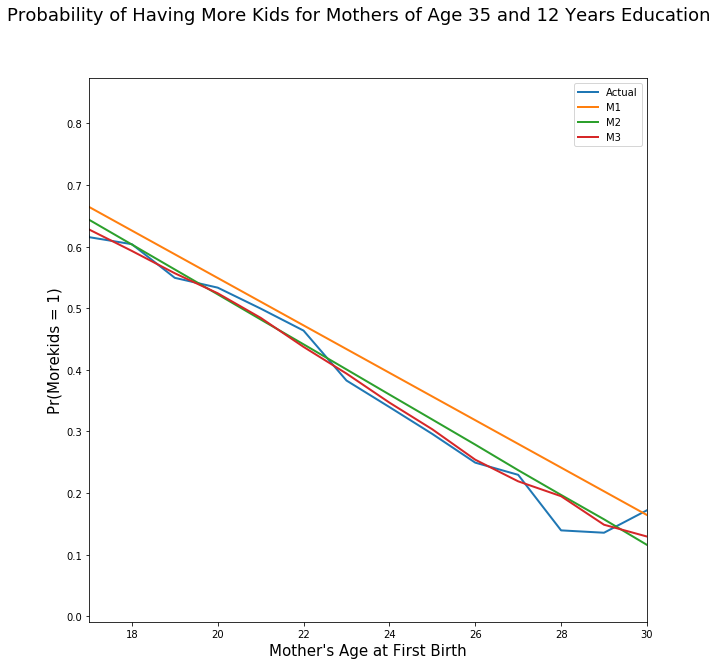

In [143]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_facecolor('#FFFFFF')
fig.suptitle('Probability of Having More Kids for Mothers of Age 35 and 12 Years Education', fontsize=18)
ax.set_xlabel("Mother's Age at First Birth",fontsize=15)
ax.set_ylabel("Pr(Morekids = 1)",fontsize=15)
for i in [actual, predictM1, predictM2, predictM3]:
    ax.plot(i, linewidth = 2)
    ax.set_xlim(17,30)
    
ax.legend(['Actual','M1','M2','M3'], fontsize = 'medium')


##### Based on your results and any other evidence you can develop, compare the advantages and disadvantages of M1, M2, M3:


    Although model 3 has the lowest RMSE, it's only a slight difference. Looking at the plotted predicted values, we can see that model 1 is overstating the predicted values consistently. Further, looking at the residual plot, we notice that the probabilities are following each other with marginal difference for model 3 ~22. Model 3 does the overall best job predicting the event having more children, it could be such that describing the event morekids requires a somewhat simpler model such as model 2 or 1. 

In [144]:
def rmse(predicted, actual):
    return np.mean(np.sqrt((actual - predicted)** 2))

def mae(predicted, actual):
    return np.mean(abs(actual - predicted))


In [145]:
pM1 = M1.predict(X1.drop('predicted', axis = 1)).values
pM2 = M2.predict(X2.drop('predicted', axis = 1)).values
pM3 = M3.predict(X3.drop(['predicted'], axis = 1)).values

M1_rmse = rmse(pM1, df['morekids'].values)
M2_rmse = rmse(pM2, df['morekids'].values)
M3_rmse = rmse(pM3, df['morekids'].values)

M1_mae = mae(pM1, df['morekids'].values)
M2_mae = mae(pM2, df['morekids'].values)
M3_mae = mae(pM3, df['morekids'].values)



rmse = {"M1": M1_rmse, "M2": M2_rmse, "M3": M3_rmse}

MAE = {"M1": M1_mae, "M2": M2_mae, "M3": M3_mae}




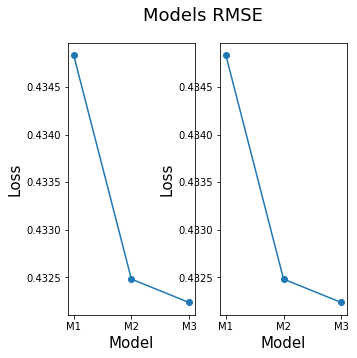

In [146]:
fig, ax = plt.subplots(1,2,figsize=(5, 5))
fig.suptitle("Models RMSE", fontsize = 18)
ax[0].set_ylabel("Loss", fontsize = 15)
ax[0].set_xlabel("Model", fontsize = 15)
ax[0].set_facecolor('#FFFFFF')
ax[0].plot(rmse.keys(),rmse.values(),marker='o')
ax[1].set_ylabel("Loss", fontsize = 15)
ax[1].set_xlabel("Model", fontsize = 15)
ax[1].set_facecolor('#FFFFFF')
ax[1].plot(MAE.keys(),MAE.values(),marker='o')



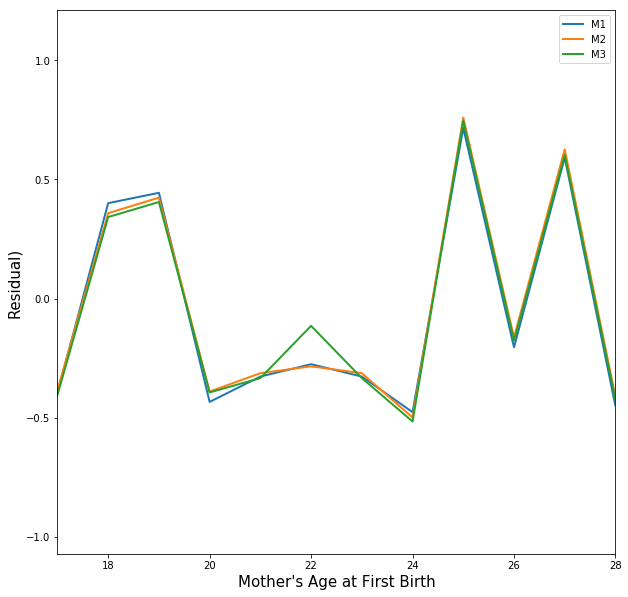

In [234]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_facecolor('#FFFFFF')
ax.set_xlabel("Mother's Age at First Birth",fontsize=15)
ax.set_ylabel("Residual)",fontsize=15)
for i in [M1.resid, M2.resid, M3.resid]:
    ax.plot(i, linewidth = 2)
    ax.set_xlim(17,28)
    
ax.legend(['M1','M2','M3'], fontsize = 'medium')

### Part I: Question 2

a) Starting from M3, estimate an extended model that also includes dad's age, dad's education, and 3 variables for mother's race/ethnicity: blackm, hispm, othracem

The updated model follows: 

$morekids = \theta_1*D_1' + \theta_2*D_2' + \theta_3*D_3' + \beta_1*aged' + \beta_2*educd' + \beta_3*blackm' + \beta_4*hispm'+ beta_5*othracem' +   \epsilon$


In [147]:
X4 = X3.drop('predicted', axis = 1)
X4['blackm'] = df['blackm']
X4['hispm'] = df['hispm']
X4['aged'] = df['aged']
X4['educd'] = df['educd']
X4['othracem'] = df['othracem']
M4 = sm.OLS(Y, X4).fit()
# sklearn has nice methods for computing the individual F-statistics


To the added model, we'd like to test whether the new variables are excludable or not. We will do so using the Chow test.

We will have 5 test to compute. Informally under the null: the restricted model(M3) fits as well as the full model.  

> $H_0: \beta_1 = \beta_2 = \beta_3 = \beta_4 = \beta_5 =0$

> $H_\alpha$: at least one $\beta$ is non-zero

Where we reject if: $F > f(0.05, df_1,df_2)$

In [148]:
from statsmodels.stats.anova import anova_lm

#Adding blackm:
m_blackm = sm.OLS(Y, X4.drop(['hispm','aged','educd','othracem'],axis = 1)).fit()
anova_result1 = anova_lm(M3,m_blackm)
#Adding hispm:
m_hispm = sm.OLS(Y, X4.drop(['blackm','aged','educd','othracem'],axis = 1)).fit()
anova_result2 = anova_lm(M3,m_hispm)
#Adding aged:
m_aged = sm.OLS(Y, X4.drop(['blackm','hispm','educd','othracem'],axis = 1)).fit()
anova_result3 = anova_lm(M3,m_aged)
#Adding educd:
m_educd = sm.OLS(Y, X4.drop(['blackm','hispm','aged','othracem'],axis = 1)).fit()
anova_result4 = anova_lm(M3,m_educd)
#Adding othracem:
m_oth = sm.OLS(Y, X4.drop(['blackm','hispm','aged','educd'],axis = 1)).fit()
anova_result5 = anova_lm(M3,m_oth)



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [149]:
display(anova_result1)
display(anova_result2)
display(anova_result3)
display(anova_result4)
display(anova_result5)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,236407.0,51196.035247,0.0,NaN,NaN,NaN
1,236406.0,51151.367078,1.0,44.668169,206.442637,8.585461e-47


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,236407.0,51196.035247,0.0,NaN,NaN,NaN
1,236406.0,51136.446419,1.0,59.588828,275.481724,7.858040e-62


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,236407.0,51196.035247,0.0,NaN,NaN,NaN
1,236406.0,51187.082368,1.0,8.952878,41.348599,1.276042e-10


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,236407.0,51196.035247,0.0,NaN,NaN,NaN
1,236406.0,51195.991627,1.0,0.043619,0.201419,0.653578


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,236407.0,51196.035247,0.0,NaN,NaN,NaN
1,236406.0,51190.694357,1.0,5.34089,24.664998,6.825925e-07


In [150]:
models = [anova_result1,anova_result2, anova_result3, anova_result4, anova_result5]
alpha = 0.05
p_values = [scipy.stats.f.cdf(0.05,53,54) for i in models]
for p_value in p_values:
    if p_value > alpha:
        print('reject')
    else:
        print('Fail to reject')





Fail to reject
Fail to reject
Fail to reject
Fail to reject
Fail to reject


Since we fail to reject the null for the five models, we can conclude that we can exclude each additional covariate.

b)
Evaluating the potential use of samesex as an "exogenous" determinant of family size. 

* Adding samesex to model 4.

In [151]:
X5 = X4
X5["samesex"] = df['samesex']
M5 = sm.OLS(Y,X5).fit()


Average effect on having more kids given that the two children before have the same sex.


In [152]:
#Conditioning on samesex.
samesex = X5.loc[X5['samesex'] == 1]

psex = M5.predict(samesex)

display(np.mean(psex))

0.4064213195845144

$pr(morekids = 1|samesex = 1)= 0.4064$

Some people have claimed that families only care about having at least 1 son – they don't care about having daughters. 
To test this hypothesis we will test the difference in means.

let:

$\hat{\theta} = E(morekids = 1 | son) - E(morekids = 1 | girl) $

then we will follow the following for our t-test:

$Z|\theta \sim \mathcal{N}(\frac{\sqrt(N)\theta}{\sqrt(\frac{\sigma^2_1}{1-\lambda}+ \frac{\sigma^2_2}{\lambda}},1)$

Under the null $\theta = 0$ :

$ Z|\theta = 0 \sim \mathcal{N}(0,1) $

In [153]:
mu_boy = df.loc[df['boys2'] == 1]["morekids"]
mu_girl = df.loc[df['girls2'] == 1]['morekids']

t2, p2 = stats.ttest_ind(mu_boy,mu_girl, equal_var = False)
print("t = " + str(t2))
print("p = " + str(p2))

t = -7.288955786850143
p = 3.143122079678091e-13


In [154]:
#interpret via p-value :

if p2 > 0.05:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.


Judging from the significantly low p-value, we can conclude that there is a significant difference between families that have two boys to two girls for the probability of having more kids. 


(iii)
   
   We are concerned that the sex composition of children is not truly random. To test this, we will consider a linear probability model in which we want to explain the event of samesex = 1. We will do so using the information on mother's and father's age, education, race/ethnicity and their ages when they started having children. 
    
Denote the information set $I = (1,agem,aged, educm, educd,blackm, blackd,hispm, hispd,othracem, othraraced, agefstm, agefstd)'$

Using our information set $I$, if sex composition in the space of our information set is truly random it will follow:

the solution to the blp:

$\mathbb{E}^*[samesex|I] = \mathbb{E}^*[samesex|1]$

By the projection theorem, the best linear predictor is simply the average of samesex. 

However, we can be more specific about this. what exactly is samsex? the probability of having same sex is:

$P[boy1 \cap boy2] = P[girl1 \cap girl2]$

If sex composition is truly random, this event is just the product of the two events. So what we really do want to test is whether we can predict, using the information set, the event that the first child is a boy or girl and prove:

$\mathbb{E}^*[boy1|I] = \mathbb{E}^*[boy1|1]$


In [155]:
X = pd.DataFrame()
X['agem'] = df['agem']
X['aged'] = df['aged']
X['educd'] = df['educd']
X['educm'] = df['educm']
X['blackm'] = df['blackm']
X['blackd'] = df['blackd']
X['hispm'] = df['hispm']
X['hispd'] = df['hispd']
X['othracem'] = df['othracem']
X['othraced'] = df['othraced']
X['agefstm'] = df['agefstm']
X['agefstd'] = df['agefstd']

X = sm.add_constant(X)
Y = df['boy1st']
display(sm.OLS(Y,X).fit().summary())
display(sm.OLS(df['samesex'],X).fit().summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 boy1st   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4656
Date:                Fri, 17 May 2019   Prob (F-statistic):              0.935
Time:                        03:13:25   Log-Likelihood:            -1.7151e+05
No. Observations:              236459   AIC:                         3.431e+05
Df Residuals:                  236446   BIC:                         3.432e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4998      0.011     46.131      0.000       0.479       0.521
agem           0.0011      0.002      0.574      0.566      -0.003       0.005
aged          -0.0005      0.002     -0.256      0.798      -0.004       0.003
educd         -0.0001      0.000     -0.304      0.761      -0.001       0.001
educm       -5.33e-05      0.001     -0.092      0.927      -0.001       0.001
blackm         0.0027      0.022      0.122      0.903      -0.041       0.047
blackd        -0.0077      0.022     -0.346      0.729      -0.051       0.036
hispm         -0.0001      0.014     -0.009      0.992      -0.028       0.028
hispd         -0.0013      0.014     -0.094      0.925      -0.028       0.026
othracem      -0.0023      0.009     -0.245      0.806      -0.020       0.016
othraced       0.0034      0.010      0.351      0.725      -0.015       0.022
agefstm       -0.0009      0.002     -0.456      0.648      -0.005       0.003
agefstd        0.0008      0.002      0.410      0.682      -0.003       0.004
==============================================================================
Omnibus:                      136.417   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39406.230
Skew:                          -0.059   Prob(JB):                         0.00
Kurtosis:                       1.004   Cond. No.                     1.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                samesex   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8536
Date:                Fri, 17 May 2019   Prob (F-statistic):              0.595
Time:                        03:13:25   Log-Likelihood:            -1.7160e+05
No. Observations:              236459   AIC:                         3.432e+05
Df Residuals:                  236446   BIC:                         3.434e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5128      0.011     47.316      0.000       0.492       0.534
agem          -0.0013      0.002     -0.668      0.504      -0.005       0.002
aged           0.0006      0.002      0.306      0.759      -0.003       0.004
educd          0.0002      0.000      0.514      0.607      -0.001       0.001
educm      -7.208e-05      0.001     -0.124      0.901      -0.001       0.001
blackm        -0.0137      0.022     -0.614      0.539      -0.058       0.030
blackd         0.0079      0.022      0.356      0.722      -0.036       0.051
hispm          0.0106      0.014      0.747      0.455      -0.017       0.038
hispd         -0.0125      0.014     -0.903      0.367      -0.040       0.015
othracem       0.0002      0.009      0.018      0.985      -0.018       0.018
othraced      -0.0078      0.010     -0.810      0.418      -0.027       0.011
agefstm        0.0014      0.002      0.739      0.460      -0.002       0.005
agefstd       -0.0008      0.002     -0.418      0.676      -0.004       0.003
==============================================================================
Omnibus:                       17.548   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39403.007
Skew:                          -0.021   Prob(JB):                         0.00
Kurtosis:                       1.001   Cond. No.                     1.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the probability model above, we can see from multiple directions that the probability of having a boy is independent of the information set. Hence, we can conclude that the event having a boy or girl is independent of the information set. Further note that since we included a constant, we get the mean event of having a boy which is is roughly 50%.

#### Question 3


#### Data Cleansing

First note that there exist some NaN's in mother's wage:

In [156]:
df.isnull().sum()

KIDCOUNT          0
boy1st            0
boy2nd            0
boys2             0
girls2            0
samesex           0
morekids          0
blackm            0
hispm             0
whitem            0
othracem          0
blackd            0
hispd             0
whited            0
othraced          0
educm             0
educd             0
agefstm           0
agefstd           0
workedm           0
workedd           0
hrsweekd          0
hrsweekm          0
annhrsm           0
annhrsd           0
wnhm              0
wnhd              0
earningsm         0
earningsd         0
faminc            0
famearn           0
agem              0
aged              0
weeksm            0
weeksd            0
wagem        110157
waged             0
expm              0
expd              0
st                0
rv                0
dtype: int64

In [157]:
df.loc[:,['wagem', 'weeksm']].head()

,wagem,weeksm
0,NaN,0
1,25.954494,30
2,NaN,0
3,NaN,0
4,15.608967,22


So this seem to be an easy fix. The NaN values for wagem corresponds to mother working 0 weeks. Hence, she does not work.

Since NaN values only exist in the space of wagem we can simply apply fillna.

In [158]:
df['wagem'] = df['wagem'].fillna(0)

In [159]:
def polynomial(df, column,  n):
    df.loc[:, f'{column}^{n}'] = df[column]**n
    return df

In [160]:
# Setting up the control variables:
df.loc[:,'educd<12'] = (df.loc[:,'educd'] < 12).astype(int)
df.loc[:,'educm<12'] = (df.loc[:,'educm'] < 12).astype(int)
polynomial(df,'agem',2)
polynomial(df,'aged',2)
polynomial(df,'agefstm',2)
polynomial(df,'agefstd',2)

control_variables = ['agefstd^2','agefstm^2','aged^2','agem^2',\
                    'educm<12','educd<12','agem','aged','blackm',\
                    'hispm','othracem','educd','educm','agefstm','agefstd']
df['not_work'] = (df['wagem'] == 0).astype(int)

In [161]:
#W1
Y = pd.DataFrame()
Y['not_work'] = (df['wagem'] == 0).astype(int)
X1 = pd.DataFrame()
X1['morekids'] = df['morekids']
X1 = sm.add_constant(X1)


W1 = sm.OLS(Y,X1).fit()

In [162]:
#W2
X2 = df.loc[:,control_variables]
X2['morekids'] = df.loc[:,'morekids']
X2 = sm.add_constant(X2)
W2 = sm.OLS(Y,X2).fit()



In [163]:
W1_morekids = W1.params['morekids']
W2_morekids = W2.params['morekids']
display(f'The coefficient for W1 : {W1_morekids}')
display(f'The coefficient for W2 : {W2_morekids}')

'The coefficient for W1 : 0.11448965715553978'

'The coefficient for W2 : 0.15960795442094552'

We can see that W1 is biased. The reason for this is that model w1 suffers from endogeneity where  morekids are correlated with error term. Intuitively this make sense. For example, we can see that the $pr[morekids|racem]$ where racem denotes the mother's ethnicity, is different. Once we control for these differences, the $pr[work|morekids]$ we can see that the probability that a mother is working given morekids is higher. 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


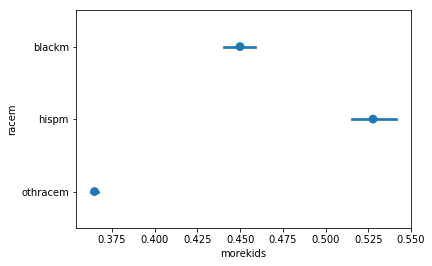

In [164]:
df['racem'] = df[['othracem','blackm','hispm']].idxmax(axis=1).astype('category')
sns.pointplot(x="morekids", y="racem", data=df, join=False)
plt.show()

b)

We will now consider a casual model relating $y_i = 1[work]$ to $x_{1i} = morekids$

From the previous notes we may use $samesex$ as a instrumental variable.

Reduced form:

$work = \delta_0 + \delta_1*samesex' + \epsilon$

First Stage:

$morekids = \pi_0 + \pi_1*samesex' + u$

In [165]:
morekids = df['morekids']
morekids = sm.add_constant(morekids)
z = pd.DataFrame()
z['samesex'] = df['samesex']
z = sm.add_constant(z)

#Reduced Form:
rf = sm.OLS(Y,z).fit()
#First Stage:
fs = sm.OLS(df['morekids'], z).fit()

from linearmodels.iv import IV2SLS
#2SLS:
cm = IV2SLS(dependent = Y, exog = morekids['const'],\
            endog = morekids['morekids'],\
            instruments = z['samesex']).fit()


In [166]:
summary = pd.DataFrame(columns = ['Reduced Form','First Stage', 'IV'])
summary.loc[0] = [rf.params['const'],fs.params['const'],cm.params['const']]
summary.loc[1] = [rf.params['samesex'],fs.params['samesex'],'-']
summary.loc[2] = ['-','-',cm.params['morekids']]

In [167]:
summary.index = ['constant','samesex','morekids']

In [168]:
display(summary)

,Reduced Form,First Stage,IV
constant,0.468576,0.339069,0.418691
samesex,0.00990904,0.0673521,-
morekids,-,-,0.147123


In [169]:
rf.params['samesex'] / fs.params['samesex']

0.14712299120697359

Adding additional Covariates to our casual model.

In [170]:
variables = df.loc[:,control_variables]
variables['morekids'] = df['morekids']
variables['samesex'] = df['samesex']
variables = sm.add_constant(variables)

#Reduced Form:
rf1 = sm.OLS(Y,variables.drop('morekids',axis = 1)).fit()
#First Stage:
fs1 = sm.OLS(df['morekids'], variables.drop('morekids',axis = 1)).fit()

#2SLS:
cm1 = IV2SLS(dependent = Y,\
            exog = variables.drop(['morekids','samesex'],axis = 1),\
            endog = variables['morekids'],\
            instruments = variables['samesex']).fit()


In [171]:
summary1 = pd.DataFrame(columns = ['Reduced Form','First Stage', 'IV'])
summary1.loc[0] = [rf1.params['const'],fs1.params['const'],cm1.params['const']]
summary1.loc[1] = [rf1.params['samesex'],fs1.params['samesex'],'-']
summary1.loc[2] = ['-','-',cm1.params['morekids']]
display(summary1)



,Reduced Form,First Stage,IV
0,0.259052,-0.539609,0.330479
1,0.0091269,0.0689503,-
2,-,-,0.132369


In [172]:
rf1.params['samesex'] / fs1.params['samesex']

0.13236918403095457

Dividing the coefficient on samesex from our First stage by our Reduced form will give us our casual coefficient on morekids from our 2SLS.

Part D asks us to prove that if an instrument is truly random, then our casual estimate will be aproximately the same whether or not we add controls to the specification. 

In order to prove this, we need our controls to be (i) orthogonal to our instrument and (2) related to our dependent variable. 

I will define orthogonality formally as: given two random variables, we define their inner product as follow: 

            ⟨𝑋,𝑌⟩=cov(𝑋,𝑌)=𝐄[(𝑋−𝐄[𝑋])(𝑌−𝐄[𝑌])]

I will relax this assumption by allowing predictors that are ~0


In [173]:
#Returns a list of orthogonal predictors to our instrument.
def find_orthogonal(instrument, controls):
    orthogonal_control_variables = []
    for i in controls.columns:
        if (abs(np.cov(instrument, controls[i])[0][1]) < 0.001):
            orthogonal_control_variables.append(i)
    return orthogonal_control_variables
    

In [174]:
orthogonal_variables = find_orthogonal(df['samesex'],\
                                       variables.drop('samesex',axis = 1))



Given the list of orthogonal predictors to our instrument, we will now  test our claim that, given a randomized instrument, whether we add controls or not will be irrelevant to the coefficient of our intsrument.

    We will test this in a two-step procedure. We will test this for only the reduced form and then the first stage form. If it is the case that the coefficient of our instrument is in fact the same when adding control and excluding controls, then our proof will be complete.

In [175]:
#Reduced Form
orthogonal_controls = variables.filter(orthogonal_variables)
orthogonal_controls['samesex'] = df['samesex']
rf_wo = sm.OLS(Y, sm.add_constant(df['samesex'])).fit()
rf_w = sm.OLS(Y, orthogonal_controls).fit()

#First Stage
fs_wo = sm.OLS(df['morekids'],sm.add_constant(df['samesex'])).fit()
fs_w = sm.OLS(df['morekids'],orthogonal_controls).fit()


In [176]:
parameters = [rf_wo.params['samesex'],rf_w.params['samesex'],fs_wo.params['samesex'],fs_w.params['samesex']]
summary_table = pd.DataFrame(columns = ['RF without','RF with'\
                                        ,'FS without', 'FS with'])
summary_table.append(pd.Series(parameters,index=summary_table.columns),ignore_index=True)



,RF without,RF with,FS without,FS with
0,0.009909,0.009821,0.067352,0.067941


e)

In [177]:
difference = cm1.params['morekids'] - cm.params['morekids']

f'the difference between Iv with and without control variables are: {difference}'

'the difference between Iv with and without control variables are: -0.014753807177271483'

To see if this difference is signifantly different we will use the same procedure as in b but this time we will use bootstrap to construct our confidence band. 

In [178]:
from sklearn.utils import resample
# Generate an empty list to store our difference in coefficience
difference = []

#Generate 1000 replications:
for i in range(100):
    #Generate bootstrap sample
    sample = resample(df)
    variables = sample.loc[:,control_variables]
    variables['morekids'] = sample['morekids']
    variables['samesex'] = sample['samesex']
    variables = sm.add_constant(variables)
    Y = pd.DataFrame()
    Y['work'] = (df['wagem'] == 0).astype(int)
    
    #compute the difference in coefficient
    cm = IV2SLS(dependent = Y, exog = morekids['const'],\
            endog = morekids['morekids'],\
            instruments = variables['samesex']).fit()
    cm1 = IV2SLS(dependent = Y,\
            exog = variables.drop(['morekids','samesex'],axis = 1),\
            endog = variables['morekids'],\
            instruments = variables['samesex']).fit()

    difference.append(cm.params['morekids'] - cm1.params['morekids'])

    

In [179]:
lbnd = np.percentile(difference,2.5)
ubnd = np.percentile(difference,97.5)

In [180]:
print(f'A 0.95 CI is [{lbnd},{ubnd}]')

A 0.95 CI is [-7.8043772812993435,12.009759167372192]


The result that we got from our bootstrap tells us that the difference between the coefficience are not significant for a $\alpha$ of at least 0.05.


f) 
  
      The casual effect of having extra kids on mother's decision to work is significant. Given that a family decides on more children, the more likely is the mother to not work. More specifically the casual effect is that given that a family decides to have more children, the mother's likelihood that she  choose to stay home is ~13.2%. Intuitively this make sense as well since morekids translates into more time spent home. 

4: 

    In this part we will compare the OLS and IV models for the effect of having a larger number of children on earnings for mothers, fathers, and the family as a whole. 

In [181]:
dependent_variables = pd.DataFrame()
dependent_variables['earnings_mother'] = df['earningsm']
dependent_variables['earnings_father'] = df['earningsd']
dependent_variables['earning family'] = df['famearn']


In [182]:
summary1 = pd.DataFrame(columns = ['Dependent_variable','OLS no ','OLS controls','IV no','IV controls'])

for i,j in zip(dependent_variables.columns,range(0,3)):
    #OLS no controls
    ols = sm.OLS(dependent_variables[i], sm.add_constant(X2[['const', 'morekids']])).fit()
    morekids = ols.params['morekids']
    
    #OLS with controls
    ols = sm.OLS(dependent_variables[i], X2).fit()
    morekids1 = ols.params['morekids']
    
    #IV no controls
    IV = IV2SLS(dependent =dependent_variables[i] , exog = X2['const'],\
            endog = X2['morekids'],\
            instruments = df['samesex']).fit()
    morekids2 = IV.params['morekids']
    #IV with controls
    IV1 = IV2SLS(dependent =dependent_variables[i] ,\
            exog = X2.drop(['morekids'],axis = 1),\
            endog = X2['morekids'],\
            instruments = df['samesex']).fit()
    morekids3 = IV1.params['morekids']
    
    #Append to DataFrame:
    summary1.loc[j] = [i, morekids, morekids1,morekids2, morekids3]
    
    
    
    
    

In [183]:
summary1 = summary1.set_index('Dependent_variable')
summary1

,OLS no,OLS controls,IV no,IV controls
Dependent_variable,,,,
earnings_mother,-3662.022087,-4882.458208,-3654.246745,-3097.655069
earnings_father,-1779.136339,-74.192863,-3155.841664,-3596.780290
earning family,-5441.158426,-4956.651071,-6810.088409,-6694.435359


    The basic idea is that the OLS overstates the effect on mother's wage given that she has more kids than the IV but understates the effect morekids has on father's earnings. I believe that the OLS follows the path which we would expect, namely that mother's are more likely to suffer a significant decrease in wage not because they have more kids but mother's are more likely to reduce their hours worked. From above calculations we found that mothers are ~17% more likely to stop working if she has morekids. I.e. in the OLS, morekids is confonfounded with the error term. This is likely due to the fact that mother's may be more naturally likely to reduce their hours worked if she has morekids. On the otherhand, for fathers, the OLS is severely understating the effect morekids has on father's wage. This is perhaps also easies to picture in terms of working. Given that a family has morekids, more time to those kids has to be attributed to them, but it also become more costly. So if mother's are more likely to reduce their hours given that they had morekids, father's are more likely to increase their hours to work in order to provide financial stability to the family. However, this confounds the true effect on fathers. Please note that there may be may reasons as to why the OLS is confounded. One other possible explanation for father's may be that there is high returns to earnings for being highly educated and/or white as  a male. 

b) 
If $y_{3i} = y_{1i} + y_{2i}$ and:

$y_{1i} = \beta_1x_i + u_{1i}$

$y_{2i} = \beta_2x_i + u_{2i}$

$y_{3i} = \beta_3x_i + u_{3i}$


Where xi is the same in all three equations, then:


$y_{3i} = y_{1i} + y_{2i} = \beta_1x_i + u_{1i}+\beta_2x_i + u_{2i} $

$=(\beta_1 + \beta_2)x_i + (u_{1i} + u_{2i})$

which implies that $\beta_3 = \beta_1 + \beta_2$

We can also show that this is true through the first order condition:

$ \hat{\beta_3} = argmax \frac{1}{N} \sum [y_{3i} - (\beta_1 + \beta_2)x_i]^2 $

Foc:

$ (\beta_1 + \beta_2) \sum x_i^2 = \sum x_i y_{3i} $

$ ==> (\beta_1 + \beta_2) = (\sum x_i^2)^{-1} \sum x_i y_{3i} = \beta_3 $


c and d)

In [184]:
combined_earning_OLS = summary1.loc['earnings_mother'][1] + summary1.loc['earnings_father'][1]
earning_family_OLS = summary1.iloc[2][1]

combined_earning_IV = summary1.loc['earnings_mother'][1] + summary1.loc['earnings_father'][1]
earning_family_IV = summary1.iloc[2][1]

for i in summary1.columns:
        combined_earning = summary1.loc['earnings_mother'][i] + summary1.loc['earnings_father'][i]
        earning_family = summary1.iloc[2][i]
        print(i)
        print(f'beta 3: {earning_family} and beta1 + beta3:{combined_earning}')
    

OLS no 
beta 3: -5441.158425694542 and beta1 + beta3:-5441.15842569454
OLS controls
beta 3: -4956.651070957119 and beta1 + beta3:-4956.651070957123
IV no
beta 3: -6810.088409263641 and beta1 + beta3:-6810.088409259915
IV controls
beta 3: -6694.435358867049 and beta1 + beta3:-6694.435358879622


In [185]:
for i in summary1.columns:
    mothers_frac = summary1.loc['earnings_mother'][i] / summary1.iloc[2][i]
    print(i)
    print(f'Mother share of the effect of total family income: {mothers_frac}%')

OLS no 
Mother share of the effect of total family income: 0.6730225073752009%
OLS controls
Mother share of the effect of total family income: 0.985031655142117%
IV no
Mother share of the effect of total family income: 0.5365931432696388%
IV controls
Mother share of the effect of total family income: 0.46272088720294596%


    We can see that for the OLS: Mother's effect is driving the effect of having more kids on total income. The difference however may be due to that mother's are more likely to stop working after having more kids than 2 whereas fathers are more likely to continue working. Controlling for more variables, mother's effect is significantly magnified.

    We can however see that the pattern does not hold for the IV estimate. Without the control variables, the share of the effect is nearly equal, with mother's having a slightly more effect. However, conrolling for our variables, father's effect is now the biggest share of the total effect. I am not 100% sure why this is the case. However, if we assume IV to be the true model, it may be such that: given a family decides on more than 2 children, the burden of more children is shared by both parents.
    
    
    
e)

In [186]:
#[d=1, z=1] - [d=1,z=0]
d1z1 = len(df.loc[(df['morekids']==1) & (df['samesex']==1)])
d1z0 = len(df.loc[(df['morekids']==1) & (df['samesex']==0)])


count_AT = d1z0

frac_AT = count_AT/len(df)
print(f"Fraction of 'always takers': {frac_AT}")



Fraction of 'always takers': 0.16774578256695663


In [187]:
d0z1 = len(df.loc[(df['morekids']==0) & (df['samesex']==1)])
d0z0 = len(df.loc[(df['morekids']==0) & (df['samesex']==0)])

count_NT = d0z1
frac_NT = count_NT/len(df)
print(f"Fraction of 'never takers': {frac_NT}")

Fraction of 'never takers': 0.2999209165225261


In [188]:
frac_C = 1 - frac_AT - frac_NT
print(f"Fraction of 'compliers': {frac_C}")

Fraction of 'compliers': 0.5323333009105173


compare the fractions of AT/NT/C for four subgroups of families based on mother's education: less than 12 years, 12 years, between 13 and 15 years, and 16+ years of education.

In [189]:
less_12 = df.loc[df['educm']<12]
exactly_12 = df.loc[df['educm']==12]
between_13_15 = df.loc[(df['educm']>12) & (df['educm']<16)]
more_than_16 = df.loc[df['educm'] >= 16]

subgroups = [less_12, exactly_12, between_13_15, more_than_16]
names = ['less than 12', 'exactly_12', 'between_13_15', 'more_than_16']
for group, name in zip(subgroups, names):
    AT = len(group.loc[(group['morekids']==1) & (group['samesex']==0)]) / len(group)
    NT = len(group.loc[(group['morekids']==0) & (group['samesex']==1)]) / len(group)
    C = 1 - AT - NT
    print(f"{name}:\n AT: {AT}\n NT: {NT}\n C: {C}")

less than 12:
 AT: 0.2338877338877339
 NT: 0.2301999801999802
 C: 0.5359122859122859
exactly_12:
 AT: 0.16073233837665565
 NT: 0.3053151933654324
 C: 0.533952468257912
between_13_15:
 AT: 0.15330540809555407
 NT: 0.3127695753151958
 C: 0.5339250165892502
more_than_16:
 AT: 0.13054100099649618
 NT: 0.3503166286283712
 C: 0.5191423703751326


    What stood out to me is that there is a higher fraction of never takers as years of education increases. This could be an indication that same sex is decrasing in education. Similarly, Always takers are decreasing as years of education is increasing. i.e families that have higher education also have less children. 
    
    Those who have 16+ years of education are less likely to be AT or C and more likely to be NT. Those with educ between
    
    
    
f)

In [190]:
from sklearn.linear_model import LinearRegression

def regression_results(model, X, y):
    """
    Returns Coefficients and Std Errors for Model
    model - model, assumed to be fitted if y = None
    X - Covariate Matrix
    y - Dependent Array
    """
    model.fit(X, y)
    coeffs = model.coef_
    
    resids = y - model.predict(X)
    
    return pd.DataFrame({"Coeff":coeffs}, index = X.columns)

In [191]:

def regression_results(model, X, y):
    """
    Returns Coefficients and Std Errors for Model
    model - model, assumed to be fitted if y = None
    X - Covariate Matrix
    y - Dependent Array
    """
    model.fit(X, y)
    coeffs = model.coef_
    
    resids = y - model.predict(X)
    
    return pd.DataFrame({"Coeff":coeffs}, index = X.columns)

In [192]:
Z = sm.add_constant(df['samesex'])
x = df['morekids']
lm = LinearRegression(fit_intercept=False)
lm.fit(Z,x)

print("first-stage results:")
display(sm.OLS(x,Z).fit().summary())
df['agefstm<21'] = (df.loc[:,'agefstm'] < 21).astype(int)
df['utah'] = (df.loc[:,'st'] == 87).astype(int)
X_pred = sm.add_constant(pd.DataFrame(lm.predict(Z) , columns = ['morekids'], index = x.index))


vars_ = ['educm<12', 'educm', 'agem','agefstm',\
         'agefstm<21', 'hispm', 'blackm', 'whitem', 'utah']
for i in vars_:
    y = df[i]
    lm.fit(X_pred, y)
    results = regression_results(lm, X_pred, y)
    
    print(f"Compliers   {i + ':':^15}{results['Coeff'].sum():.5f}")
    print(f"Sample Mean {i + ':':^15}{df[i].mean():.5f} \n")
        



first-stage results:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               morekids   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1152.
Date:                Fri, 17 May 2019   Prob (F-statistic):          6.87e-252
Time:                        03:16:49   Log-Likelihood:            -1.6317e+05
No. Observations:              236459   AIC:                         3.264e+05
Df Residuals:                  236457   BIC:                         3.264e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3391      0.001    240.375      0.000       0.336       0.342
samesex        0.0674      0.002     33.940      0.000       0.063       0.071
==============================================================================
Omnibus:                     9494.639   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39431.027
Skew:                           0.521   Prob(JB):                         0.00
Kurtosis:                       1.292   Cond. No.                         2.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Compliers      educm<12:   0.14313
Sample Mean    educm<12:   0.17087 

Compliers       educm:     12.48400
Sample Mean     educm:     12.42263 

Compliers        agem:     30.19062
Sample Mean      agem:     30.36734 

Compliers      agefstm:    20.97587
Sample Mean    agefstm:    20.84279 

Compliers     agefstm<21:  0.47131
Sample Mean   agefstm<21:  0.49717 

Compliers       hispm:     0.02457
Sample Mean     hispm:     0.02510 

Compliers       blackm:    0.03892
Sample Mean     blackm:    0.04971 

Compliers       whitem:    0.91292
Sample Mean     whitem:    0.89673 

Compliers        utah:     0.00853
Sample Mean      utah:     0.01052 



### Part 2


In [193]:
df['logwaged'] = np.log(df['waged'])

train,test = df.loc[(df['educd'] == 16) & (df['rv'] < 0.75)], df.loc[(df['educd'] == 16) & (df['rv'] >= 0.75)]
assert len(train) == 20923             
assert len(test) == 7065 

1. Estimate a simple OLS model on teh estimation sample that includes age, a set of dummies for the state of residence, and interactions of the state of residence with age. Since tehre are 51 states, this model has a constant, age, 50 state dummies, 50 interactions of age with state-- totalling 100 variables in addition to a constant. 

In [194]:
Y_train, Y_test = train['logwaged'], test['logwaged']
#####Train#######
#Adds a dummy for all the states. 
X_train = pd.DataFrame()
X_train['age'] = train['aged']
dummies = pd.get_dummies(train['st'], prefix = 'st', drop_first = True)
educD = ['st_' + str(i) for i in range(0,51)]
X_train = X_train.merge(dummies, how = 'left',left_index = True, right_index = True )

#Adding interaction 1[age*state]
state_list = sorted(train['st'].unique())[1:]
for st in state_list:
    X_train[f'aged*st_{st}'] = X_train['age'] * X_train[f'st_{st}'] 

X_train = sm.add_constant(X_train)

####Test#########
#Adds a dummy for all the states. 
X_test = pd.DataFrame()
X_test['age'] = test['aged']
dummies = pd.get_dummies(test['st'], prefix = 'st', drop_first = True)
educD = ['st_' + str(i) for i in range(0,51)]
X_test = X_test.merge(dummies, how = 'left',left_index = True, right_index = True )

#Adding interaction 1[age*state]
state_list1 = sorted(test['st'].unique())[1:]
for st in state_list1:
    X_test[f'aged*st_{st}'] = X_test['age'] * X_test[f'st_{st}'] 

X_test = sm.add_constant(X_test)

assert len(X_train.columns) == 102


In [195]:
linear_model = LinearRegression(fit_intercept=False)
lm = linear_model.fit(X_train,Y_train)

res_26 = {}
res_35 = {}

# Predicting earnings for men age 26 for each state:
for st in state_list:
    subset = X_train.loc[(train['aged'] == 26) & (train['st'] == st)]
    subset2 = X_train[(train['aged'] == 35) & (train['st'] == st)]
    
    if(len(subset)):
        predict26 = lm.predict(subset).mean()
        res_26[st] = predict26
    else:
        predict26 = 0
        res_26[st] = predict26
    if(len(subset2)):
        predict35 = lm.predict(subset2).mean()
        res_35[st] = predict35
    else:
        predict26 = 0
        res_35[st] = predict35
        
        
    
    
    print(f"Mean logWage for 26 year old men in {st} is: {predict26}")
    print(f"Mean logWage for 35 year old men in {st} is: {predict35}\n")
    
predicted_linear = pd.DataFrame([res_26,res_35 ], index = ['26yr', '35yr']).T




Mean logWage for 26 year old men in 12 is: 3.2717601245733716
Mean logWage for 35 year old men in 12 is: 3.4651617895689193

Mean logWage for 26 year old men in 13 is: 0
Mean logWage for 35 year old men in 13 is: 3.3134837381463784

Mean logWage for 26 year old men in 14 is: 3.2334233397212353
Mean logWage for 35 year old men in 14 is: 3.562858034305682

Mean logWage for 26 year old men in 15 is: 3.267129126515728
Mean logWage for 35 year old men in 15 is: 3.5172446348396273

Mean logWage for 26 year old men in 16 is: 3.2702906356089603
Mean logWage for 35 year old men in 16 is: 3.6359987837259626

Mean logWage for 26 year old men in 21 is: 3.3713856495322636
Mean logWage for 35 year old men in 21 is: 3.5924816179754573

Mean logWage for 26 year old men in 22 is: 3.4693173025712447
Mean logWage for 35 year old men in 22 is: 3.692556786412985

Mean logWage for 26 year old men in 23 is: 3.2347382692149638
Mean logWage for 35 year old men in 23 is: 3.565245484887405

Mean logWage for 26 y

2)

Using K-fold cross validation within the estimation sample, estimate a lasso version of the same model, and use this model to predict earnings again. 

In [196]:
## Lasso regression with  5 fold cross validation 
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5)
ls = lasso.fit(X_train, Y_train)


res1_26 = {}
res1_35 = {}
# Predicting earnings for men age 26 for each state:
for st in state_list:
    subset = X_train.loc[(train['aged'] == 26) & (train['st'] == st)]
    subset2 = X_train[(train['aged'] == 35) & (train['st'] == st)]
    
    if(len(subset)):
        predict26 = ls.predict(subset).mean()
        res1_26[st] = predict26
    else:
        predict26 = 0
        res1_26[st] = predict26
    if(len(subset2)):
        predict35 = ls.predict(subset2).mean()
        res1_35[st] = predict35
    else:
        predict26 = 0
        res1_35[st] = predict35
        
        
    
    
    print(f"Mean logWage for 26 year old men in {st} is: {predict26}")
    print(f"Mean logWage for 35 year old men in {st} is: {predict35}\n")
    
predicted_lasso = pd.DataFrame([res_26,res_35 ], index = ['26yr', '35yr']).T


Mean logWage for 26 year old men in 12 is: 3.309726258860922
Mean logWage for 35 year old men in 12 is: 3.50589020758165

Mean logWage for 26 year old men in 13 is: 0
Mean logWage for 35 year old men in 13 is: 3.5058902075816496

Mean logWage for 26 year old men in 14 is: 3.309726258860922
Mean logWage for 35 year old men in 14 is: 3.505890207581649

Mean logWage for 26 year old men in 15 is: 3.309726258860922
Mean logWage for 35 year old men in 15 is: 3.50589020758165

Mean logWage for 26 year old men in 16 is: 3.309726258860922
Mean logWage for 35 year old men in 16 is: 3.505890207581649

Mean logWage for 26 year old men in 21 is: 3.3457700773448744
Mean logWage for 35 year old men in 21 is: 3.554410732463893

Mean logWage for 26 year old men in 22 is: 3.4040295671444754
Mean logWage for 35 year old men in 22 is: 3.6328369687325877

Mean logWage for 26 year old men in 23 is: 3.3097262588609215
Mean logWage for 35 year old men in 23 is: 3.5058902075816505

Mean logWage for 26 year old

Based on the two models, what is the 'best' state for young men with a college degree? What is the best for men age 35?

In [197]:
best_26_linear = predicted_linear['26yr'].idxmax()
best_35_linear = predicted_linear['35yr'].idxmax()
print('OLS')
print(f'The state to live in for 26 year old is: {best_26_linear}')
print(f'The state to live in for 26 year old is: {best_35_linear}')

best_26_lasso = predicted_lasso['26yr'].idxmax()
best_35_lasso = predicted_lasso['35yr'].idxmax()
print('Lasso')
print(f'The state to live in for 26 year old is: {best_26_lasso}')
print(f'The state to live in for 26 year old is: {best_35_lasso}')

OLS
The state to live in for 26 year old is: 83
The state to live in for 26 year old is: 94
Lasso
The state to live in for 26 year old is: 83
The state to live in for 26 year old is: 94


In [221]:
X_test['st_53'] = np.zeros(len(X_test))
X_test['aged*st_53'] = np.zeros(len(X_test))


In [224]:
from sklearn.metrics import mean_squared_error

linear_pred = lm.predict(X_test)
lasso_pred = ls.predict(X_test)
linear_RMSE = mean_squared_error(linear_pred, Y_test)
lasso_RMSE = mean_squared_error(lasso_pred, Y_test)

print(f"Linear Model RMSE: {linear_RMSE}")
print(f"Lasso Model RMSE: {lasso_RMSE}")

Linear Model RMSE: 1.0153703152743023
Lasso Model RMSE: 0.26828621411714026


I do not know why my linear model is giving me an incorrect RMSE. However, from the graph below it should be indicated that the linear model does slightly better than the Lasso. 

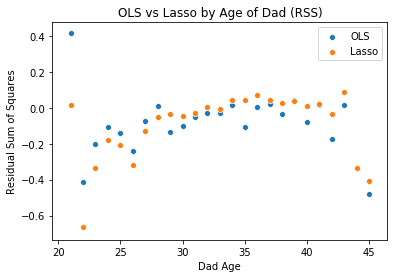

In [229]:
final_df = df.loc[(df['rv'] > .75) & (df['educd'] == 16)].loc[:,['aged', 'logwaged']]
final_df['lin_pred'] = linear_pred
final_df['las_pred'] = lasso_pred
final_df['ols RSS'] = final_df['logwaged'] - final_df['lin_pred']
final_df['lasso RSS'] = final_df['logwaged'] - final_df['las_pred']

#final_df.sort_values('aged', inplace = True)
grouped = final_df.groupby('aged', as_index = False).mean()
sns.scatterplot(x = 'aged', y = 'ols RSS', label = 'OLS', data = grouped)
sns.scatterplot(x = 'aged', y = 'lasso RSS', label = 'Lasso', data = grouped)

plt.title("OLS vs Lasso by Age of Dad (RSS)")
plt.xlabel("Dad Age")
plt.ylabel("Residual Sum of Squares")

plt.show()